# temporal-oracle-vs-sisb

Compare SISB to a temporal oracle for different stream localization schemes
(PC, global, set)

3/8/2024

In [1]:
import os
import sys

from matplotlib import colormaps
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("../../../"))
from naboo_utils import table, file

# ~~~ Configuration ~~~
sim_dir = "/u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_3200"
baseline_study = "baseline"
baseline_experiment = "_baseline"

suite_file = "/u/cmolder/GitHub/ChampSim-2022/external/naboo/conf/suites.toml"
benchmark_file = "/u/cmolder/GitHub/ChampSim-2022/external/naboo/conf/benchmarks.toml"
mix_file = "/u/cmolder/GitHub/ChampSim-2022/external/naboo/conf/mixes.toml"
mix_set = "1core_twilight"



# ~~~ Study ~~~
study = file.ChampsimStudy.FromExperimentDirs({ 
    "SISB Set":      os.path.join(sim_dir, "sisb", "sisb_set"),
    "SISB Set (6b)": os.path.join(sim_dir, "sisb", "sisb_set_b6"),
    "SISB Set (8b)": os.path.join(sim_dir, "sisb", "sisb_set_b8"),
    "Oracle Set":    os.path.join(sim_dir, "temporal_oracle", "temporal_oracle_global_set_nocold_1"),

    "SISB Global":   os.path.join(sim_dir, "sisb", "sisb_global"),
    "Oracle Global": os.path.join(sim_dir, "temporal_oracle", "temporal_oracle_global_cache_nocold_1"),

    "SISB PC":       os.path.join(sim_dir, "sisb", "sisb_pc"),
    "Oracle PC":     os.path.join(sim_dir, "temporal_oracle", "temporal_oracle_pc_cache_nocold_1"),
})

study.read_all(
    baseline_study=file.ChampsimStudy.FromStudyDir(os.path.join(sim_dir, baseline_study)), 
    baseline_exp=baseline_experiment, 
    num_threads=16
)

tabler = table.ChampsimTabler(study, suite_file, benchmark_file, mix_file, mix_set)

# ~~~ Plotting ~~~
dpi = 192
os.makedirs("temporal_oracle_vs_sisb", exist_ok=True)

[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 384/384 [00:02<00:00, 144.81file/s]


[ipykernel_launcher][angrist-3] Collating study files...


# SISB vs. Oracle

In [2]:
experiments = [
    "SISB Global", "Oracle Global", "SISB PC", "Oracle PC", 
    "SISB Set", "SISB Set (6b)", "SISB Set (8b)", "Oracle Set"
]
colors = {
    "SISB Global":   colormaps["Greens"](0.45),
    "SISB PC":       colormaps["Blues"](0.45),
    "SISB Set":      colormaps["Oranges"](0.45),
    "SISB Set (6b)": colormaps["Oranges"](0.55),
    "SISB Set (8b)": colormaps["Oranges"](0.65),
    "Oracle Global": colormaps["Greens"](0.8),
    "Oracle PC":     colormaps["Blues"](0.8),
    "Oracle Set":    colormaps["Oranges"](0.8),
}
hatches = {
    "SISB Global":   "",
    "SISB PC":       "",
    "SISB Set":      "",
    "SISB Set (6b)": "",
    "SISB Set (8b)": "",
    "Oracle Global": "////",
    "Oracle PC":     "////",
    "Oracle Set":    "////",
}
legend_kwargs = {
    "ncol": 4,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
label_kwargs = {
    "rotation": 0,
    "ha": "center",
    "fontsize": 7,
}

## IPC improvement

,gap,google,spec06,spec17,gmean
SISB Global,5.711317,4.797950,10.488210,5.269136,6.542483
Oracle Global,13.969100,5.062605,14.182367,7.231084,10.037004
SISB PC,18.431281,4.608711,26.113620,14.647746,15.688569
Oracle PC,20.622766,7.672771,32.330548,16.087809,18.848984
SISB Set,1.202865,-5.510732,10.536886,2.665441,2.064967
SISB Set (6b),6.132485,6.421101,17.632964,8.850838,9.662774
SISB Set (8b),6.570413,4.183994,18.893921,8.329526,9.354343
Oracle Set,26.688481,8.938980,38.039102,13.943074,21.381534


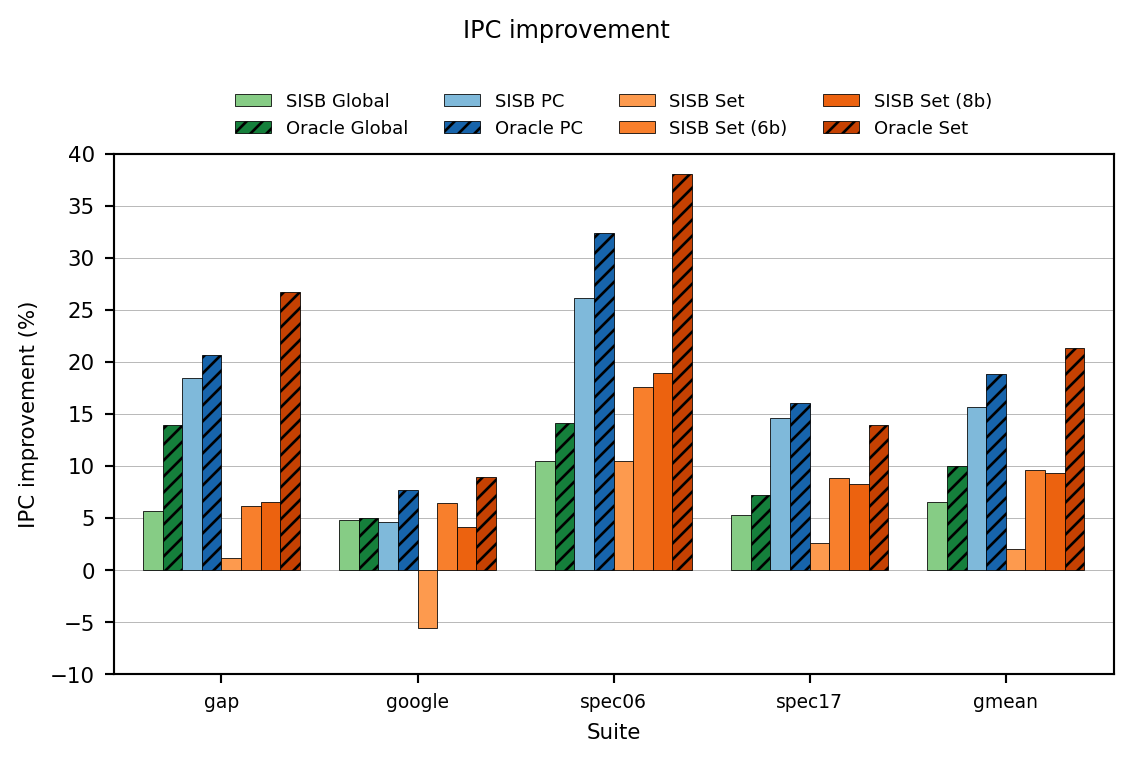

In [3]:
figsize = (6, 4)
ylim = (-10, 40)
ytick_distance = 5

ipc_improvement = tabler.table_statistic_suite(
    "cpu.gmean.ipc_improvement", experiments=experiments, 
    add_mean=True
)

ipc_improvement.display()
ipc_improvement.plot(
    legend_kwargs=legend_kwargs,
    label_kwargs=label_kwargs,
    colors=colors, hatches=hatches,
    add_suptitle=True, suptitle="IPC improvement",
    ylabel="IPC improvement (%)",
    ylim=ylim, ytick_distance=ytick_distance,
    figsize=figsize, dpi=dpi
)
plt.savefig("temporal_oracle_vs_sisb/ipc_improvement.png", bbox_inches="tight", dpi=dpi)

#### spec06

,astar,gcc,mcf,omnetpp,soplex,sphinx3,xalancbmk,gmean
SISB Global,8.846262,11.429090,11.436661,12.456769,7.941171,13.865301,7.598754,10.488210
Oracle Global,11.952011,13.865104,22.192068,16.285792,12.254376,14.297812,8.882950,14.182367
SISB PC,11.477598,21.304588,26.265053,42.070009,28.900045,37.223598,18.250142,26.113620
Oracle PC,17.799513,24.236177,40.519441,49.715719,34.361265,40.564921,22.200886,32.330548
SISB Set,3.980441,14.678126,14.995216,-11.147518,-0.628756,49.837186,11.144675,10.536886
SISB Set (6b),7.567598,20.824683,25.190123,11.214830,16.737107,26.670599,16.479268,17.632964
SISB Set (8b),5.858932,20.109549,24.163881,6.993401,15.648729,47.977599,16.177866,18.893921
Oracle Set,18.295206,31.831731,64.677233,35.438334,45.847126,54.793113,21.619472,38.039102


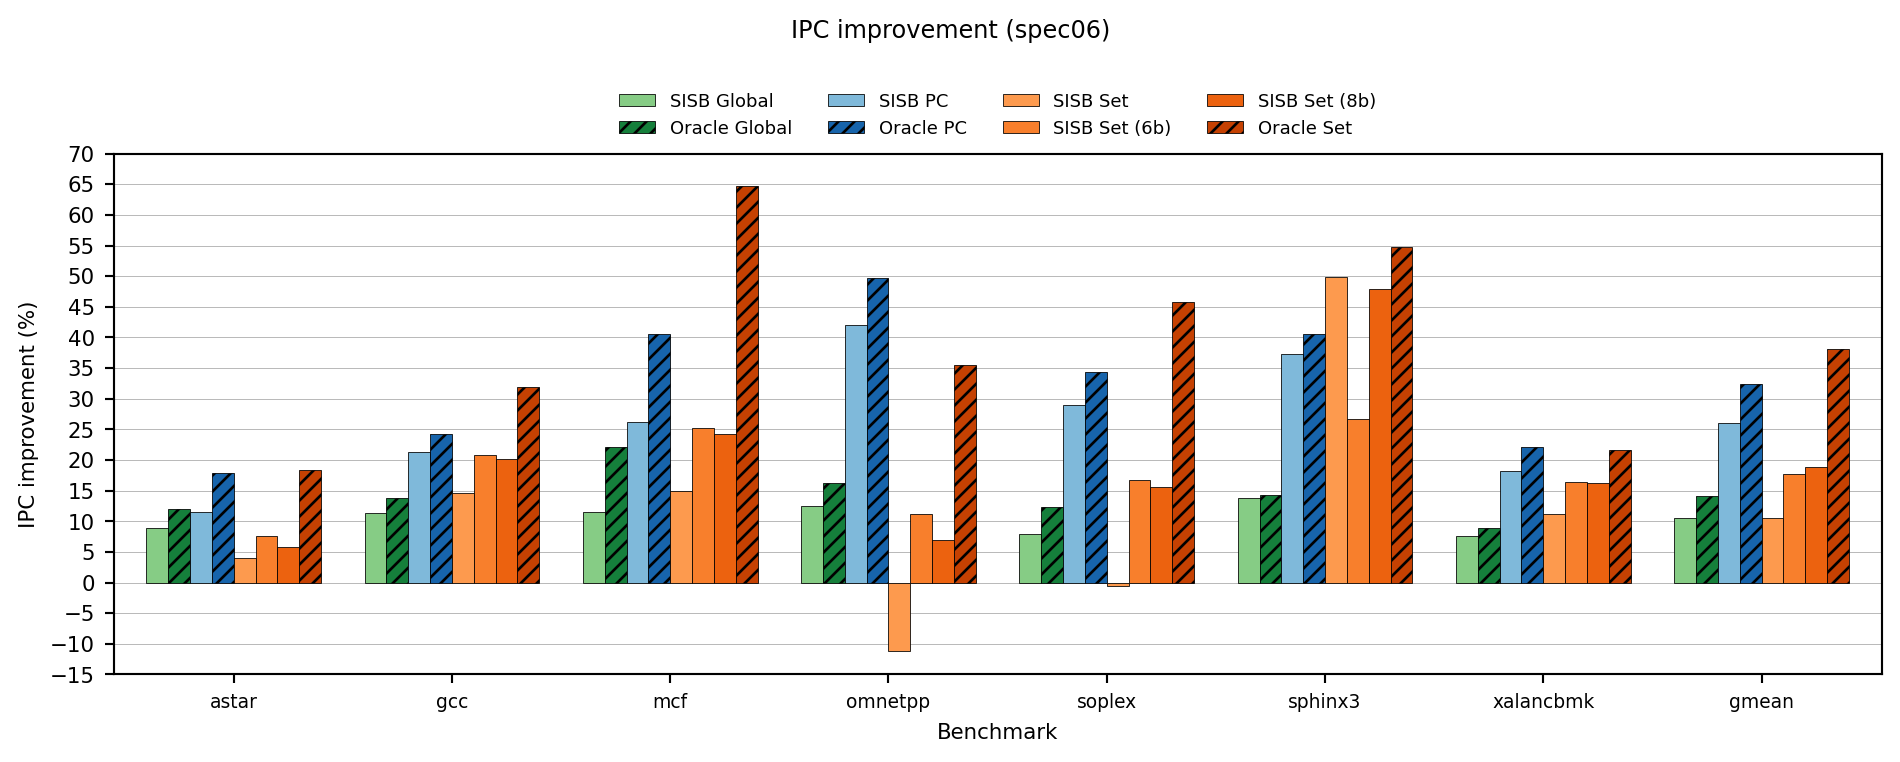

In [4]:
suite = "spec06"
figsize = (10, 4)
ylim = (-15, 70)
ytick_distance = 5

ipc_improvement_suite = tabler.table_statistic_benchmark(
    "cpu.gmean.ipc_improvement", experiments=experiments, suites={suite},
    filter=True, add_mean=True
)

ipc_improvement_suite.display()
ipc_improvement_suite.plot(
    legend_kwargs=legend_kwargs,
    label_kwargs=label_kwargs,
    colors=colors, hatches=hatches,
    add_suptitle=True, suptitle=f"IPC improvement ({suite})",
    ylabel="IPC improvement (%)",
    ylim=ylim, ytick_distance=ytick_distance,
    figsize=figsize, dpi=dpi
)
plt.savefig(f"temporal_oracle_vs_sisb/ipc_improvement__{suite}.png", 
            bbox_inches="tight", dpi=dpi)

### spec17

,602.gcc,605.mcf,607.cactuBSSN,620.omnetpp,621.wrf,623.xalancbmk,654.roms,gmean
SISB Global,30.296527,0.668667,-3.136912,13.747365,-4.722407,4.332668,-0.282933,5.269136
Oracle Global,25.094066,5.658077,0.237191,13.992274,1.581568,4.559840,1.629864,7.231084
SISB PC,32.437147,7.173691,8.980558,27.120502,4.029969,11.292352,14.359492,14.647746
Oracle PC,26.341799,15.865302,7.793007,41.799370,3.707500,11.880194,9.440374,16.087809
SISB Set,26.246682,2.652046,-0.841138,-8.149507,-6.399584,10.246097,-1.297459,2.665441
SISB Set (6b),35.007149,6.880889,2.020189,12.099369,-3.600692,11.590373,1.994250,8.850838
SISB Set (8b),32.644414,7.756379,3.651581,5.984502,-2.562709,11.597447,2.541148,8.329526
Oracle Set,30.394993,14.648799,4.417828,30.510500,4.785886,12.390939,3.927602,13.943074


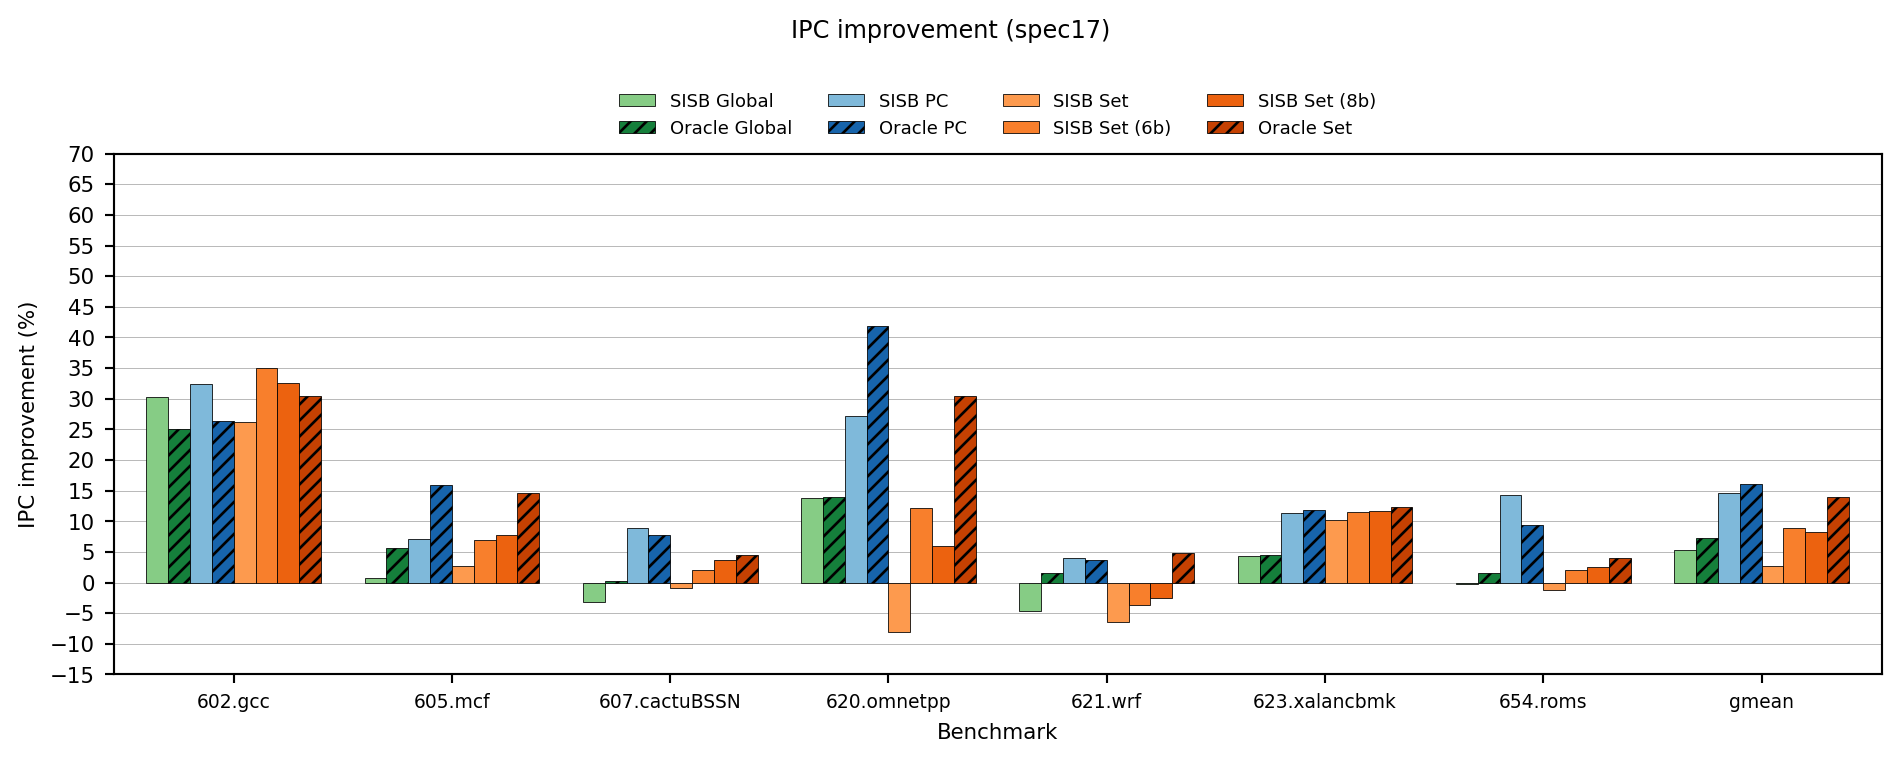

In [5]:
suite = "spec17"
figsize = (10, 4)
ylim = (-15, 70)
ytick_distance = 5

ipc_improvement_suite = tabler.table_statistic_benchmark(
    "cpu.gmean.ipc_improvement", experiments=experiments, suites={suite},
    filter=True, add_mean=True
)

ipc_improvement_suite.display()
ipc_improvement_suite.plot(
    legend_kwargs=legend_kwargs,
    label_kwargs=label_kwargs,
    colors=colors, hatches=hatches,
    add_suptitle=True, suptitle=f"IPC improvement ({suite})",
    ylabel="IPC improvement (%)",
    ylim=ylim, ytick_distance=ytick_distance,
    figsize=figsize, dpi=dpi
)
plt.savefig(f"temporal_oracle_vs_sisb/ipc_improvement__{suite}.png", 
            bbox_inches="tight", dpi=dpi)

### gap

,bfs,cc,pr,gmean
SISB Global,13.120862,5.306133,-0.832795,5.711317
Oracle Global,30.321350,13.076182,0.455717,13.969100
SISB PC,34.985615,22.704297,0.288705,18.431281
Oracle PC,47.626269,18.030773,0.723071,20.622766
SISB Set,1.935252,2.676288,-0.966105,1.202865
SISB Set (6b),16.565276,3.126376,-0.549711,6.132485
SISB Set (8b),15.356920,5.499052,-0.547034,6.570413
Oracle Set,62.713660,22.972049,1.620415,26.688481


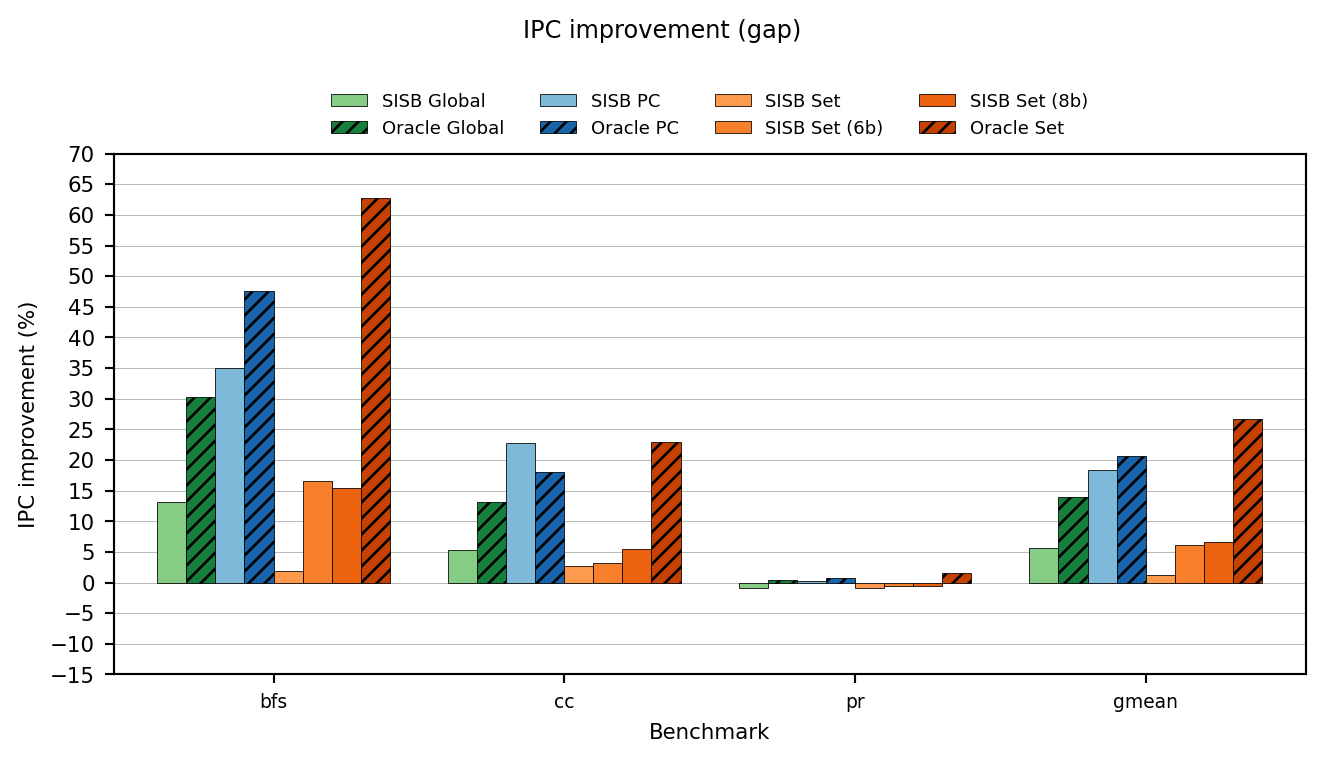

In [6]:
suite = "gap"
figsize = (7, 4)
ylim = (-15, 70)
ytick_distance = 5

ipc_improvement_suite = tabler.table_statistic_benchmark(
    "cpu.gmean.ipc_improvement", experiments=experiments, suites={suite},
    filter=True, add_mean=True
)

ipc_improvement_suite.display()
ipc_improvement_suite.plot(
    legend_kwargs=legend_kwargs,
    label_kwargs=label_kwargs,
    colors=colors, hatches=hatches,
    add_suptitle=True, suptitle=f"IPC improvement ({suite})",
    ylabel="IPC improvement (%)",
    ylim=ylim, ytick_distance=ytick_distance,
    figsize=figsize, dpi=dpi
)
plt.savefig(f"temporal_oracle_vs_sisb/ipc_improvement__{suite}.png", 
            bbox_inches="tight", dpi=dpi)

### google

,charlie,delta,merced,whiskey,gmean
SISB Global,2.254747,4.168543,5.810550,7.019300,4.797950
Oracle Global,3.180609,4.601709,5.938444,6.561960,5.062605
SISB PC,6.416624,3.511253,1.903988,6.680042,4.608711
Oracle PC,8.825648,8.323761,2.509481,11.225542,7.672771
SISB Set,-7.441758,-2.262902,-4.406018,-7.822516,-5.510732
SISB Set (6b),2.235673,6.284071,8.353989,8.942026,6.421101
SISB Set (8b),0.581226,4.778385,5.818586,5.646092,4.183994
Oracle Set,4.397719,8.752465,9.438426,13.353061,8.938980


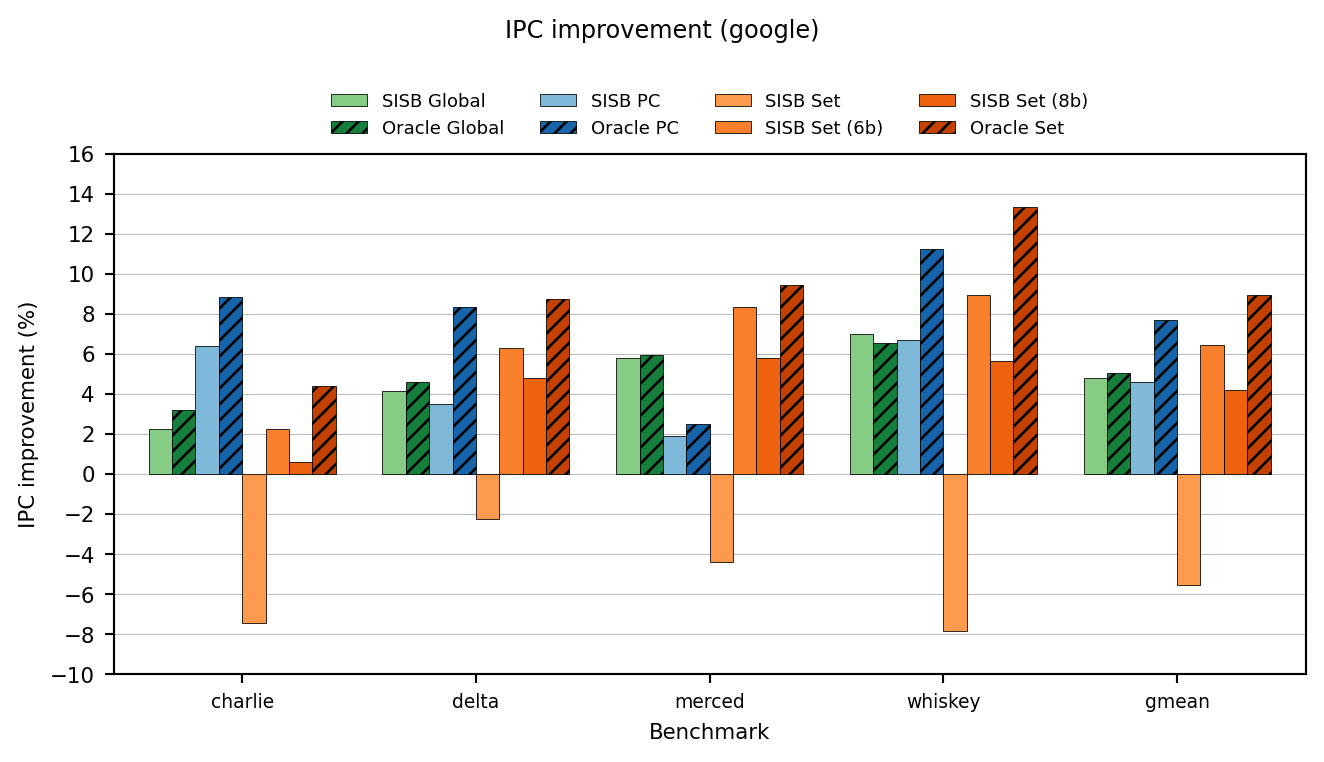

In [7]:
suite = "google"
figsize = (7, 4)
ylim = (-10, 16)
ytick_distance = 2

ipc_improvement_suite = tabler.table_statistic_benchmark(
    "cpu.gmean.ipc_improvement", experiments=experiments, suites={suite},
    filter=True, add_mean=True
)

ipc_improvement_suite.display()
ipc_improvement_suite.plot(
    legend_kwargs=legend_kwargs,
    label_kwargs=label_kwargs,
    colors=colors, hatches=hatches,
    add_suptitle=True, suptitle=f"IPC improvement ({suite})",
    ylabel="IPC improvement (%)",
    ylim=ylim, ytick_distance=ytick_distance, 
    figsize=figsize, dpi=dpi
)
plt.savefig(f"temporal_oracle_vs_sisb/ipc_improvement__{suite}.png", 
            bbox_inches="tight", dpi=dpi)

## Prefetch accuracy

,gap,google,spec06,spec17,amean
SISB Global,20.918548,24.664406,44.285294,27.655044,29.380823
Oracle Global,99.396839,96.285258,99.203814,84.471535,94.839361
SISB PC,44.783958,23.791573,53.350978,40.806854,40.683341
Oracle PC,99.940673,71.699861,99.173428,82.748409,88.390593
SISB Set,28.046458,19.335676,43.983696,28.305801,29.917908
SISB Set (6b),20.597444,25.870988,44.250982,30.551492,30.317727
SISB Set (8b),26.002090,23.853979,44.696485,30.451191,31.250936
Oracle Set,99.857311,98.219192,98.937047,84.677863,95.422853


,gap,google,spec06,spec17,amean
SISB Global,16.883230,14.889051,23.419651,19.525972,18.679476
Oracle Global,57.331252,36.898561,40.350758,30.451105,41.257919
SISB PC,36.447087,19.566968,40.396195,32.379865,32.197529
Oracle PC,79.086359,59.378583,72.980953,63.845693,68.822897
SISB Set,28.037272,19.274683,43.831577,27.700061,29.710898
SISB Set (6b),20.481030,25.137607,39.891538,24.838820,27.587249
SISB Set (8b),25.961411,23.590533,43.559441,27.387922,30.124827
Oracle Set,99.724133,97.858775,98.453226,83.087101,94.780809


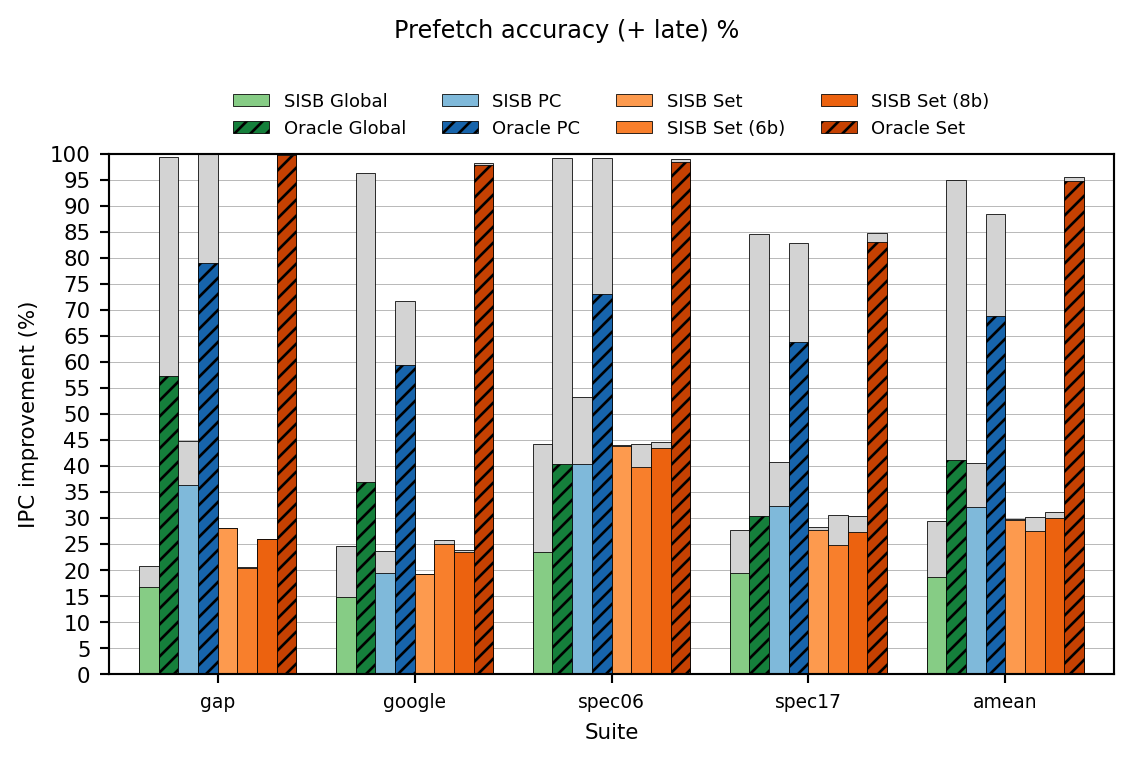

In [18]:
figsize = (6, 4)
ylim = (0, 100)
ytick_distance = 5

prefetch_accuracy = tabler.table_statistic_suite(
    "cache.LLC.amean.prefetch_accuracy", experiments=experiments, 
    add_mean=True, replace_nan=0.0
)
prefetch_accuracy_timely = tabler.table_statistic_suite(
    "cache.LLC.amean.prefetch_accuracy_timely", experiments=experiments, 
    add_mean=True, replace_nan=0.0
)

prefetch_accuracy.display()
prefetch_accuracy_timely.display()
prefetch_accuracy_timely.plot(
    secondary_results=[prefetch_accuracy],
    legend_kwargs=legend_kwargs,
    label_kwargs=label_kwargs,
    colors=colors, hatches=hatches,
    add_suptitle=True, suptitle="Prefetch accuracy (+ late) %",
    ylabel="IPC improvement (%)",
    ylim=ylim, ytick_distance=ytick_distance,
    figsize=figsize, dpi=dpi
)
plt.savefig("temporal_oracle_vs_sisb/prefetch_accuracy.png", bbox_inches="tight", dpi=dpi)

#### spec06

,astar,gcc,mcf,omnetpp,soplex,sphinx3,xalancbmk,amean
SISB Global,41.002593,39.110764,31.951346,43.687769,40.803517,78.005508,35.435558,44.285294
Oracle Global,99.446265,99.818922,99.686643,99.336086,97.791573,98.897617,99.449590,99.203814
SISB PC,44.150537,45.376405,39.341925,64.442160,55.479646,85.542597,39.123575,53.350978
Oracle PC,99.932241,99.783151,99.753971,99.476248,99.377117,99.789697,96.101569,99.173428
SISB Set,40.724940,36.325922,34.234312,34.763948,47.176635,81.425317,33.234801,43.983696
SISB Set (6b),35.239941,37.667391,36.692577,37.349309,45.228027,81.952966,35.626663,44.250982
SISB Set (8b),37.404992,37.468443,36.229707,37.130538,47.045853,82.236175,35.359683,44.696485
Oracle Set,99.243078,96.443063,98.785438,99.635599,99.759399,99.621386,99.071369,98.937047


,astar,gcc,mcf,omnetpp,soplex,sphinx3,xalancbmk,amean
SISB Global,31.900759,21.094664,15.122729,26.588938,23.220747,25.330611,20.679109,23.419651
Oracle Global,57.597261,48.190690,32.988773,36.058475,30.847243,28.229073,48.543793,40.350758
SISB PC,39.009419,35.046759,31.770445,55.321161,35.149700,50.475649,36.000235,40.396195
Oracle PC,83.038859,84.029142,64.097515,81.156447,53.692874,59.213874,85.637963,72.980953
SISB Set,40.638289,36.279644,34.175660,34.663193,47.024714,80.886754,33.152784,43.831577
SISB Set (6b),34.435179,36.894929,35.279355,36.223128,42.304564,59.624689,34.478921,39.891538
SISB Set (8b),37.053228,37.223107,35.828013,36.712933,46.062373,77.103752,34.932683,43.559441
Oracle Set,98.588266,96.329056,98.366695,99.290814,98.782411,99.007034,98.808310,98.453226


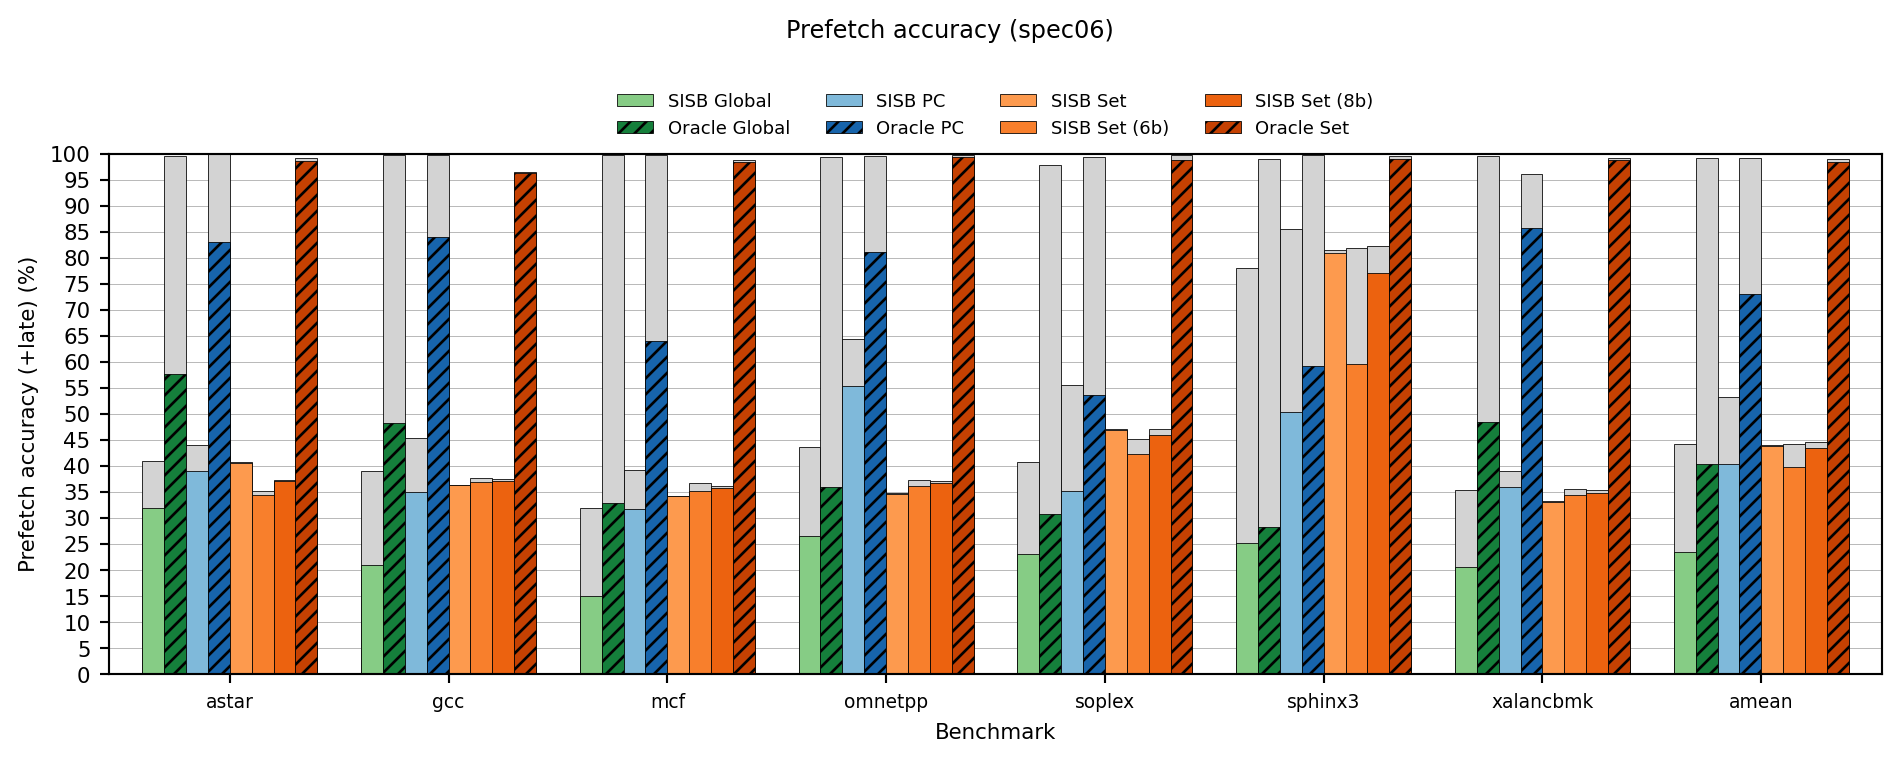

In [9]:
suite = "spec06"
figsize = (10, 4)
ylim = (0, 100)
ytick_distance = 5

prefetch_accuracy_suite = tabler.table_statistic_benchmark(
    "cache.LLC.amean.prefetch_accuracy", experiments=experiments, suites={suite},
    filter=True, add_mean=True, replace_nan=0.0
)

prefetch_accuracy_timely_suite = tabler.table_statistic_benchmark(
    "cache.LLC.amean.prefetch_accuracy_timely", experiments=experiments, suites={suite},
    filter=True, add_mean=True, replace_nan=0.0
)

prefetch_accuracy_suite.display()
prefetch_accuracy_timely_suite.display()
prefetch_accuracy_timely_suite.plot(
    secondary_results=[prefetch_accuracy_suite],
    legend_kwargs=legend_kwargs,
    label_kwargs=label_kwargs,
    colors=colors, hatches=hatches,
    add_suptitle=True, suptitle=f"Prefetch accuracy ({suite})",
    ylabel="Prefetch accuracy (+late) (%)",
    ylim=ylim, ytick_distance=ytick_distance,
    figsize=figsize, dpi=dpi
)
plt.savefig(f"temporal_oracle_vs_sisb/prefetch_accuracy__{suite}.png", 
            bbox_inches="tight", dpi=dpi)

#### spec17

,602.gcc,605.mcf,607.cactuBSSN,620.omnetpp,621.wrf,623.xalancbmk,654.roms,amean
SISB Global,68.742349,16.419587,14.622363,42.097904,13.783501,16.110345,21.809258,27.655044
Oracle Global,99.899466,98.572271,99.825321,99.391488,45.649936,99.713946,48.248314,84.471535
SISB PC,67.579429,21.297268,44.737557,53.212971,30.037592,18.284704,50.498457,40.806854
Oracle PC,87.100842,99.479734,99.937086,99.687688,45.942290,96.519930,50.571291,82.748409
SISB Set,60.307048,20.703028,31.346052,23.476483,18.226882,17.753088,26.328028,28.305801
SISB Set (6b),65.710108,20.867312,40.644030,31.935725,14.656341,17.980773,22.066157,30.551492
SISB Set (8b),63.250667,20.996805,40.343710,27.622217,18.229873,18.199651,24.515412,30.451191
Oracle Set,98.718248,98.416938,99.927321,99.670789,45.755083,99.681201,50.575464,84.677863


,602.gcc,605.mcf,607.cactuBSSN,620.omnetpp,621.wrf,623.xalancbmk,654.roms,amean
SISB Global,61.691209,6.887184,12.855856,27.612736,6.913292,9.209230,11.512300,19.525972
Oracle Global,77.608943,15.151534,1.902088,41.513887,11.794919,53.510760,11.675605,30.451105
SISB PC,64.870844,10.142116,44.737552,46.320770,17.292998,17.845937,25.448841,32.379865
Oracle PC,80.270556,47.879193,99.913003,83.852576,23.629822,84.932587,26.442112,63.845693
SISB Set,60.302086,20.500197,27.506011,23.453714,18.180978,17.742416,26.215024,27.700061
SISB Set (6b),65.627955,17.960492,6.358581,31.469620,14.048751,17.871873,20.534469,24.838820
SISB Set (8b),63.225833,19.523901,21.379460,27.502844,17.990129,18.159291,23.933996,27.387922
Oracle Set,98.696580,97.931067,90.132366,99.494229,45.545562,99.566890,50.243016,83.087101


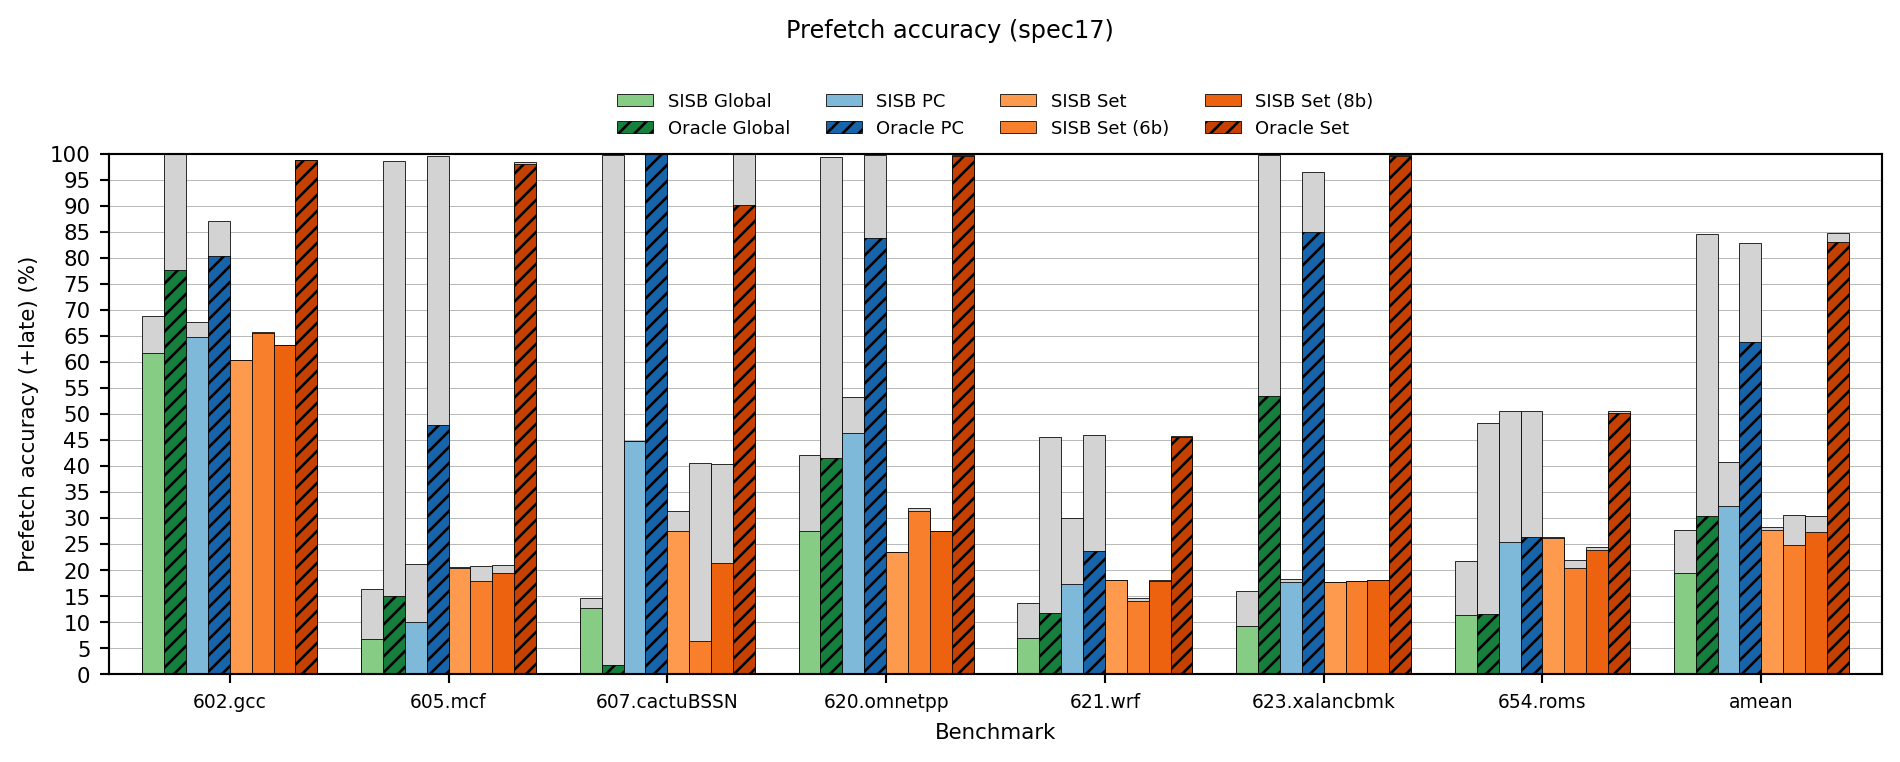

In [10]:
suite = "spec17"
figsize = (10, 4)
ylim = (0, 100)
ytick_distance = 5

prefetch_accuracy_suite = tabler.table_statistic_benchmark(
    "cache.LLC.amean.prefetch_accuracy", experiments=experiments, suites={suite},
    filter=True, add_mean=True, replace_nan=0.0
)

prefetch_accuracy_timely_suite = tabler.table_statistic_benchmark(
    "cache.LLC.amean.prefetch_accuracy_timely", experiments=experiments, suites={suite},
    filter=True, add_mean=True, replace_nan=0.0
)

prefetch_accuracy_suite.display()
prefetch_accuracy_timely_suite.display()
prefetch_accuracy_timely_suite.plot(
    secondary_results=[prefetch_accuracy_suite],
    legend_kwargs=legend_kwargs,
    label_kwargs=label_kwargs,
    colors=colors, hatches=hatches,
    add_suptitle=True, suptitle=f"Prefetch accuracy ({suite})",
    ylabel="Prefetch accuracy (+late) (%)",
    ylim=ylim, ytick_distance=ytick_distance,
    figsize=figsize, dpi=dpi
)
plt.savefig(f"temporal_oracle_vs_sisb/prefetch_accuracy__{suite}.png", 
            bbox_inches="tight", dpi=dpi)

### gap

,bfs,cc,pr,amean
SISB Global,42.134774,9.641685,10.979185,20.918548
Oracle Global,99.973989,99.954603,98.261925,99.396839
SISB PC,60.882796,35.676544,37.792534,44.783958
Oracle PC,99.913396,99.968839,99.939784,99.940673
SISB Set,47.151399,18.578632,18.409343,28.046458
SISB Set (6b),45.373728,7.413034,9.005571,20.597444
SISB Set (8b),47.630035,14.518584,15.857652,26.002090
Oracle Set,99.698603,99.939949,99.933382,99.857311


,bfs,cc,pr,amean
SISB Global,34.910731,6.629644,9.109313,16.883230
Oracle Global,59.723120,52.496843,59.773792,57.331252
SISB PC,55.253425,21.268066,32.819770,36.447087
Oracle PC,88.334663,63.658578,85.265836,79.086359
SISB Set,47.134018,18.574949,18.402850,28.037272
SISB Set (6b),45.088028,7.386382,8.968679,20.481030
SISB Set (8b),47.532377,14.507924,15.843933,25.961411
Oracle Set,99.609894,99.766095,99.796408,99.724133


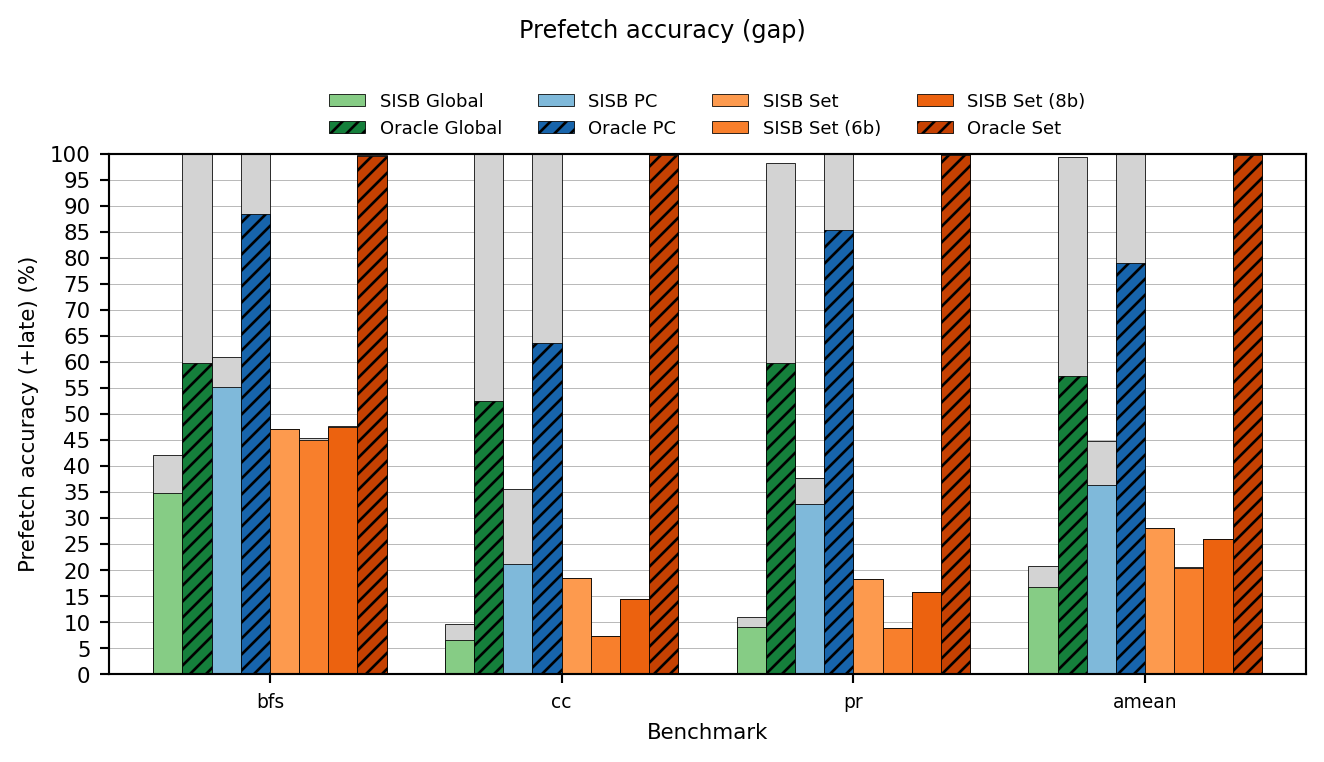

In [11]:
suite = "gap"
figsize = (7, 4)
ylim = (0, 100)
ytick_distance = 5

prefetch_accuracy_suite = tabler.table_statistic_benchmark(
    "cache.LLC.amean.prefetch_accuracy", experiments=experiments, suites={suite},
    filter=True, add_mean=True, replace_nan=0.0
)

prefetch_accuracy_timely_suite = tabler.table_statistic_benchmark(
    "cache.LLC.amean.prefetch_accuracy_timely", experiments=experiments, suites={suite},
    filter=True, add_mean=True, replace_nan=0.0
)

prefetch_accuracy_suite.display()
prefetch_accuracy_timely_suite.display()
prefetch_accuracy_timely_suite.plot(
    secondary_results=[prefetch_accuracy_suite],
    legend_kwargs=legend_kwargs,
    label_kwargs=label_kwargs,
    colors=colors, hatches=hatches,
    add_suptitle=True, suptitle=f"Prefetch accuracy ({suite})",
    ylabel="Prefetch accuracy (+late) (%)",
    ylim=ylim, ytick_distance=ytick_distance,
    figsize=figsize, dpi=dpi
)
plt.savefig(f"temporal_oracle_vs_sisb/prefetch_accuracy__{suite}.png", 
            bbox_inches="tight", dpi=dpi)

### google

,charlie,delta,merced,whiskey,amean
SISB Global,18.433581,17.809283,29.400004,33.014758,24.664406
Oracle Global,96.326860,96.019744,95.828508,96.965921,96.285258
SISB PC,32.693973,16.179882,13.754609,32.537828,23.791573
Oracle PC,90.714499,68.461124,42.122663,85.501156,71.699861
SISB Set,12.187888,15.228852,25.192889,24.733076,19.335676
SISB Set (6b),17.869048,21.383880,31.417470,32.813557,25.870988
SISB Set (8b),16.849523,19.356165,29.288613,29.921613,23.853979
Oracle Set,98.889213,97.339322,98.063810,98.584422,98.219192


,charlie,delta,merced,whiskey,amean
SISB Global,13.442393,10.755620,16.510429,18.847762,14.889051
Oracle Global,37.499726,35.145204,40.644172,34.305142,36.898561
SISB PC,29.787977,11.633452,9.977394,26.869048,19.566968
Oracle PC,79.303245,52.344930,37.034546,68.831614,59.378583
SISB Set,12.165161,15.201625,25.149931,24.582014,19.274683
SISB Set (6b),17.559265,20.822468,30.577301,31.591392,25.137607
SISB Set (8b),16.745653,19.101685,29.028742,29.486051,23.590533
Oracle Set,98.544973,97.040288,97.837482,98.012358,97.858775


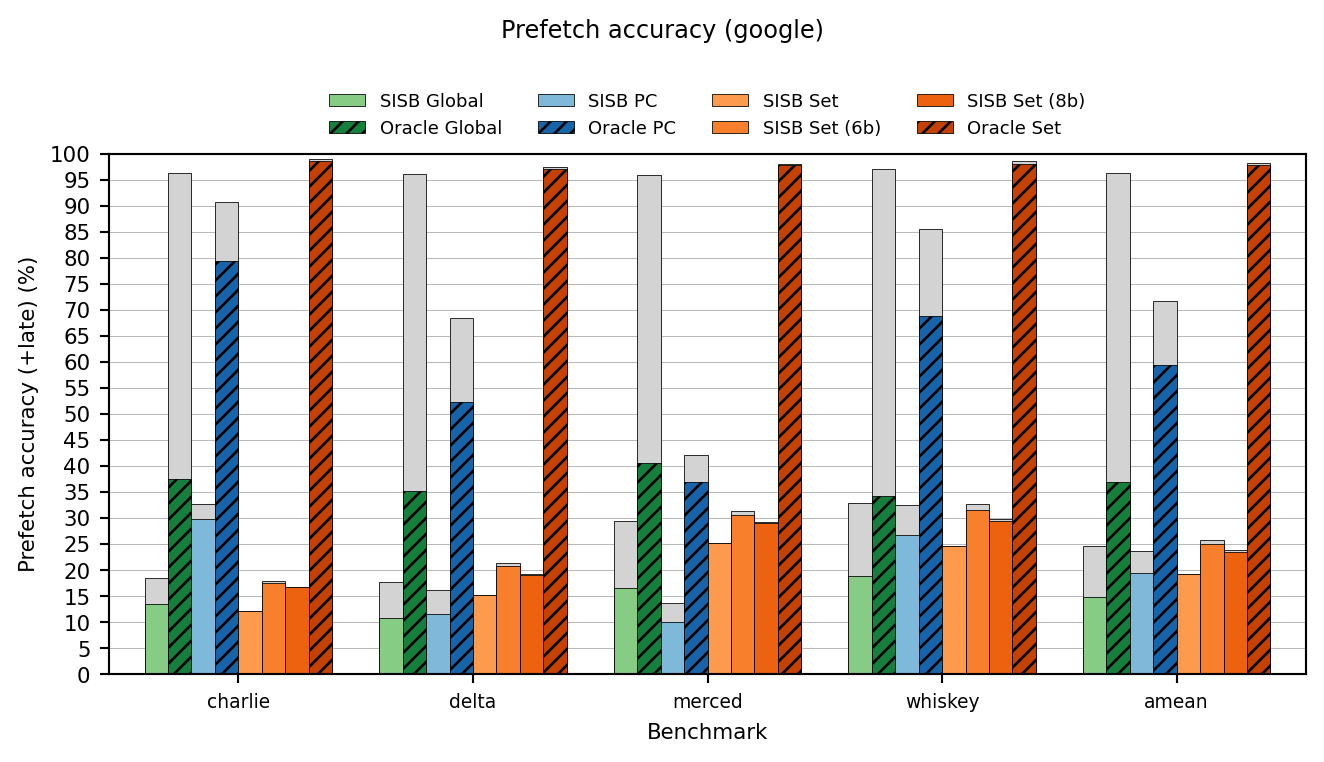

In [12]:
suite = "google"
figsize = (7, 4)
ylim = (0, 100)
ytick_distance = 5

prefetch_accuracy_suite = tabler.table_statistic_benchmark(
    "cache.LLC.amean.prefetch_accuracy", experiments=experiments, suites={suite},
    filter=True, add_mean=True, replace_nan=0.0
)

prefetch_accuracy_timely_suite = tabler.table_statistic_benchmark(
    "cache.LLC.amean.prefetch_accuracy_timely", experiments=experiments, suites={suite},
    filter=True, add_mean=True, replace_nan=0.0
)

prefetch_accuracy_suite.display()
prefetch_accuracy_timely_suite.display()
prefetch_accuracy_timely_suite.plot(
    secondary_results=[prefetch_accuracy_suite],
    legend_kwargs=legend_kwargs,
    label_kwargs=label_kwargs,
    colors=colors, hatches=hatches,
    add_suptitle=True, suptitle=f"Prefetch accuracy ({suite})",
    ylabel="Prefetch accuracy (+late) (%)",
    ylim=ylim, ytick_distance=ytick_distance,
    figsize=figsize, dpi=dpi
)
plt.savefig(f"temporal_oracle_vs_sisb/prefetch_accuracy__{suite}.png", 
            bbox_inches="tight", dpi=dpi)

## Prefetch coverage

,gap,google,spec06,spec17,amean
SISB Global,23.304732,9.076251,15.078226,16.527173,15.996595
Oracle Global,41.539912,6.910335,15.214952,13.240111,19.226328
SISB PC,69.191426,10.946831,34.508177,32.772741,36.854794
Oracle PC,66.631677,15.599046,38.062371,32.462178,38.188818
SISB Set,49.496079,12.739442,37.181788,25.467047,31.221089
SISB Set (6b),29.396294,18.158900,32.292073,22.550120,25.599347
SISB Set (8b),43.362324,16.559763,36.774656,25.504447,30.550297
Oracle Set,86.106991,30.613168,57.775775,41.139051,53.908746


,gap,google,spec06,spec17,amean
SISB Global,30.647690,16.284489,30.581231,23.389928,25.225835
Oracle Global,71.595836,18.016813,39.462790,26.492248,38.891922
SISB PC,88.828763,13.773515,46.199774,39.296498,47.024638
Oracle PC,83.493629,18.980825,53.464254,41.117935,49.264161
SISB Set,49.512626,12.793212,37.363250,26.210967,31.470014
SISB Set (6b),29.579782,18.792879,36.593059,29.319185,28.571226
SISB Set (8b),43.427395,16.786811,38.010730,29.235488,31.865106
Oracle Set,86.219717,30.731571,58.096525,41.782941,54.207688


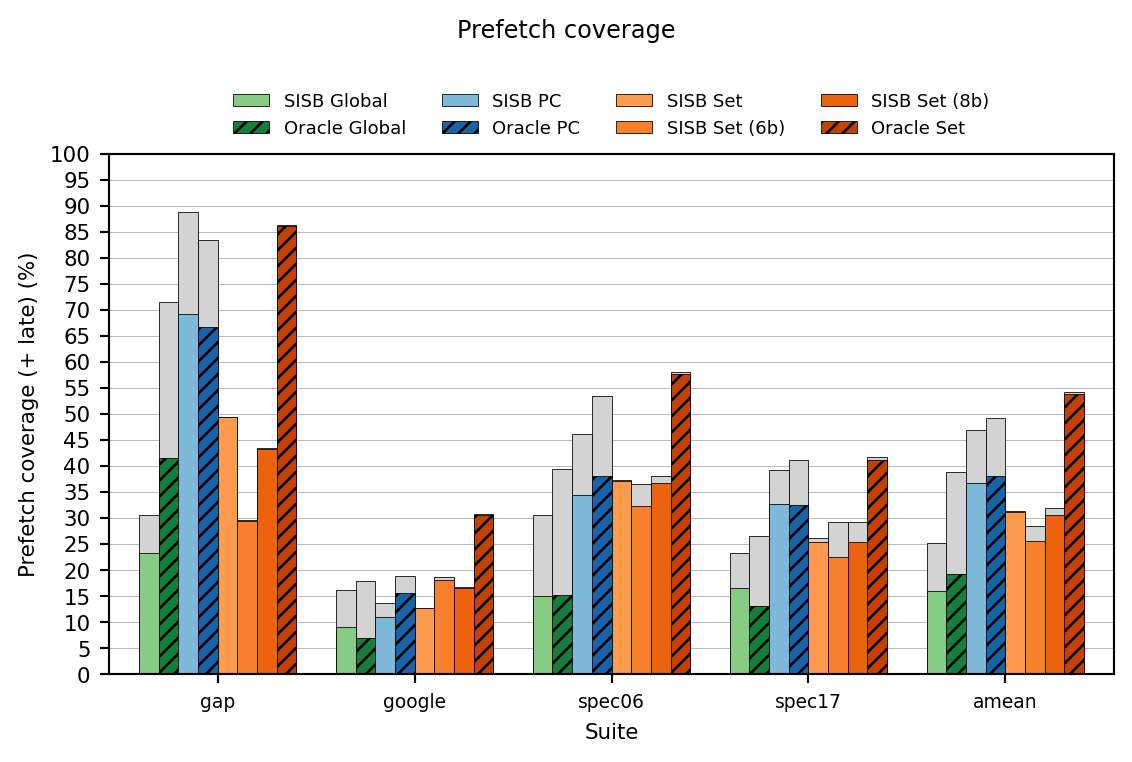

In [13]:
figsize = (6, 4)
ylim = (0, 100)
ytick_distance = 5

prefetch_coverage = tabler.table_statistic_suite(
    "cache.LLC.amean.prefetch_coverage", experiments=experiments, 
    add_mean=True, replace_nan=0.0
)
prefetch_coverage_untimely = tabler.table_statistic_suite(
    "cache.LLC.amean.prefetch_coverage_untimely", experiments=experiments, 
    add_mean=True, replace_nan=0.0
)

prefetch_coverage.display()
prefetch_coverage_untimely.display()
prefetch_coverage.plot(
    secondary_results=[prefetch_coverage_untimely],
    legend_kwargs=legend_kwargs,
    label_kwargs=label_kwargs,
    colors=colors, hatches=hatches,
    add_suptitle=True, suptitle="Prefetch coverage",
    ylabel="Prefetch coverage (+ late) (%)",
    ylim=ylim, ytick_distance=ytick_distance,
    figsize=figsize, dpi=dpi
)
plt.savefig("temporal_oracle_vs_sisb/prefetch_coverage.png", bbox_inches="tight", dpi=dpi)

### spec06

,astar,gcc,mcf,omnetpp,soplex,sphinx3,xalancbmk,amean
SISB Global,23.521580,11.829928,9.807654,19.975851,14.619718,17.400381,8.392472,15.078226
Oracle Global,26.741098,11.478291,13.514458,17.179773,12.060406,15.255318,10.275320,15.214952
SISB PC,28.593452,21.724788,28.415605,57.358760,31.007748,48.713377,25.743507,34.508177
Oracle PC,41.339681,23.521292,33.532892,58.690574,29.406506,49.337407,30.608244,38.062371
SISB Set,30.867916,22.981777,27.105450,30.371657,43.320089,81.814475,23.811156,37.181788
SISB Set (6b),24.782464,22.961864,30.472730,32.063328,37.292919,53.811497,24.659707,32.292073
SISB Set (8b),28.126724,23.296143,30.605868,32.888203,41.901766,75.700591,24.903295,36.774656
Oracle Set,47.152370,30.821294,55.968772,75.326434,73.756979,86.919541,34.485038,57.775775


,astar,gcc,mcf,omnetpp,soplex,sphinx3,xalancbmk,amean
SISB Global,29.561741,23.421040,23.616838,35.251040,29.921434,54.925865,17.370662,30.581231
Oracle Global,45.642323,28.029743,41.979595,46.493766,38.199875,53.458739,22.435489,39.462790
SISB PC,32.180425,28.507853,35.276054,67.188345,49.712412,83.333954,27.199375,46.199774
Oracle PC,49.706865,31.297153,52.469291,70.523486,54.422749,83.147292,32.682938,53.464254
SISB Set,31.118242,23.012684,27.158521,30.548096,43.480798,82.361134,23.863278,37.363250
SISB Set (6b),27.048806,23.477597,31.750732,33.804363,40.346469,74.379001,25.344447,36.593059
SISB Set (8b),29.128249,23.460029,30.969496,33.581867,42.937368,80.848584,25.149520,38.010730
Oracle Set,47.447058,30.888145,56.217396,75.615004,74.485341,87.458293,34.564439,58.096525


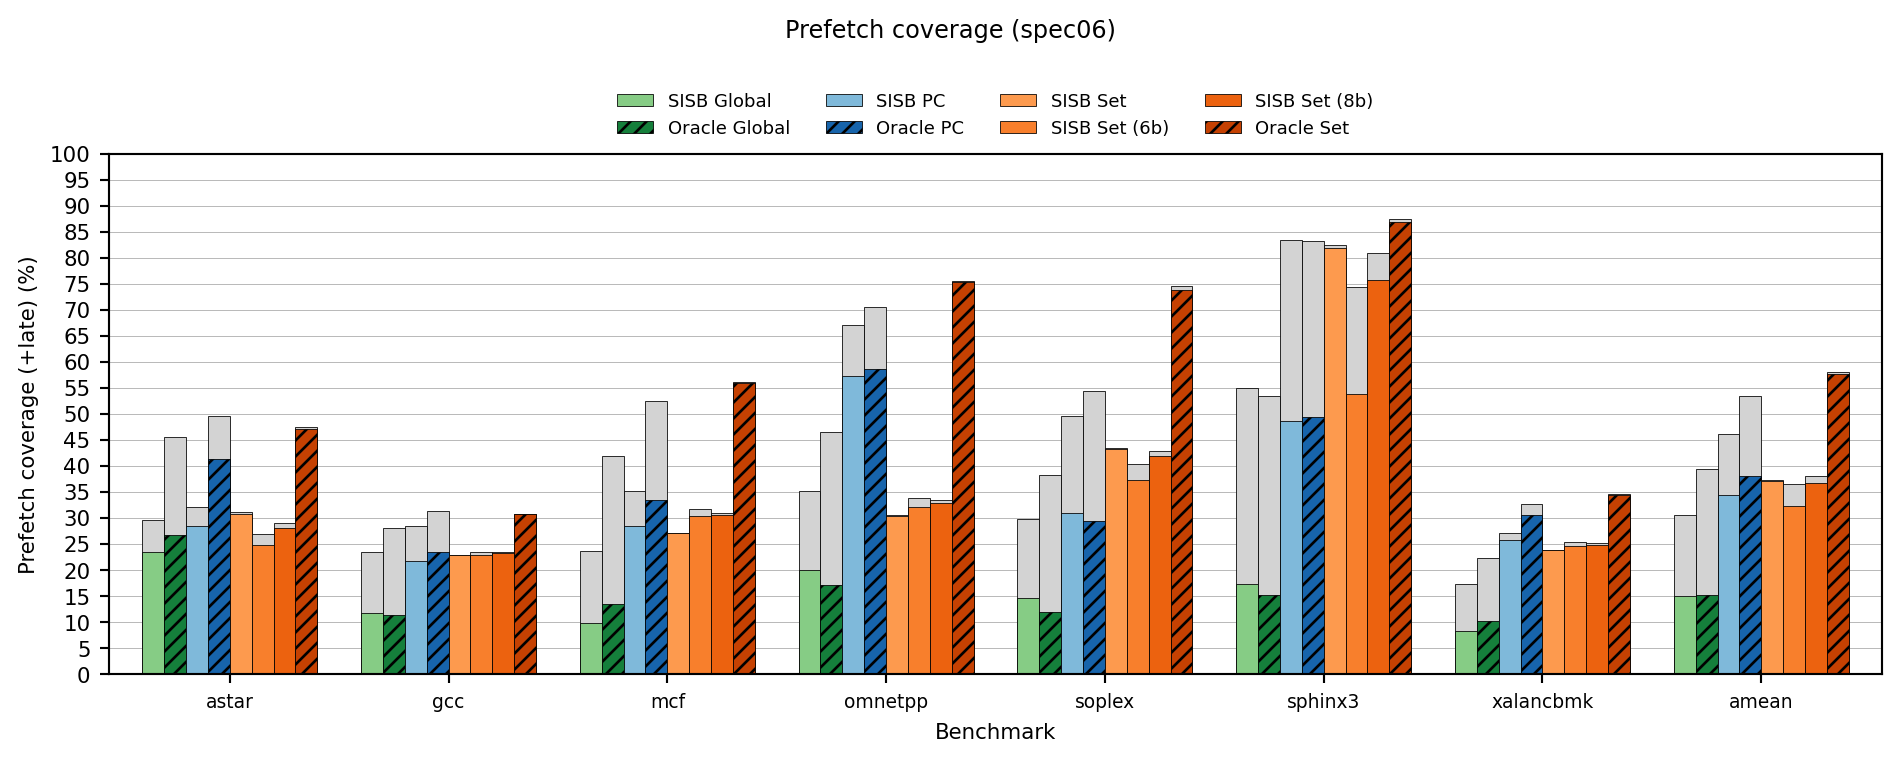

In [14]:
suite = "spec06"
figsize = (10, 4)
ylim = (0, 100)
ytick_distance = 5

prefetch_coverage_suite = tabler.table_statistic_benchmark(
    "cache.LLC.amean.prefetch_coverage", experiments=experiments, suites={suite},
    filter=True, add_mean=True, replace_nan=0.0
)

prefetch_coverage_untimely_suite = tabler.table_statistic_benchmark(
    "cache.LLC.amean.prefetch_coverage_untimely", experiments=experiments, suites={suite},
    filter=True, add_mean=True, replace_nan=0.0
)

prefetch_coverage_suite.display()
prefetch_coverage_untimely_suite.display()
prefetch_coverage_suite.plot(
    secondary_results=[prefetch_coverage_untimely_suite],
    legend_kwargs=legend_kwargs,
    label_kwargs=label_kwargs,
    colors=colors, hatches=hatches,
    add_suptitle=True, suptitle=f"Prefetch coverage ({suite})",
    ylabel="Prefetch coverage (+late) (%)",
    ylim=ylim, ytick_distance=ytick_distance,
    figsize=figsize, dpi=dpi
)
plt.savefig(f"temporal_oracle_vs_sisb/prefetch_coverage__{suite}.png", 
            bbox_inches="tight", dpi=dpi)

### spec17

,602.gcc,605.mcf,607.cactuBSSN,620.omnetpp,621.wrf,623.xalancbmk,654.roms,amean
SISB Global,60.947241,3.008208,14.328781,24.578203,-1.905126,9.350991,5.381911,16.527173
Oracle Global,52.709116,4.220683,0.153044,18.787798,3.380137,10.765242,2.664757,13.240111
SISB PC,63.056580,8.411582,56.565955,51.103962,12.629135,23.171272,14.470702,32.772741
Oracle PC,53.504952,18.352399,47.098776,60.099943,10.591947,25.640893,11.946338,32.462178
SISB Set,59.530728,17.865263,33.953447,19.357244,9.937318,22.165123,15.460209,25.467047
SISB Set (6b),65.291009,14.932319,7.805381,31.148801,4.245746,22.906904,11.520682,22.550120
SISB Set (8b),62.747578,17.367070,26.607918,25.573461,9.076737,23.142459,14.015905,25.504447
Oracle Set,63.216469,44.937249,34.365398,67.913796,25.154434,29.141442,23.244567,41.139051


,602.gcc,605.mcf,607.cactuBSSN,620.omnetpp,621.wrf,623.xalancbmk,654.roms,amean
SISB Global,68.952144,9.764833,16.358662,38.579423,3.131856,16.297265,10.645315,23.389928
Oracle Global,61.735603,24.747960,9.432566,44.986835,13.079457,20.446288,11.017030,26.492248
SISB PC,65.719156,19.309584,56.565963,59.070101,21.954770,23.743448,28.712466,39.296498
Oracle PC,57.741965,41.050517,47.110389,71.464841,20.688413,26.916882,22.852538,41.117935
SISB Set,59.537173,18.091692,38.781796,19.383753,9.976218,22.178306,15.527831,26.210967
SISB Set (6b),65.390695,18.273358,49.661090,31.691497,4.742125,23.049296,12.426233,29.319185
SISB Set (8b),62.778306,19.071393,50.252663,25.712554,9.277388,23.194303,14.361813,29.235488
Oracle Set,63.226510,45.207769,38.184240,68.033955,25.273289,29.157089,23.397733,41.782941


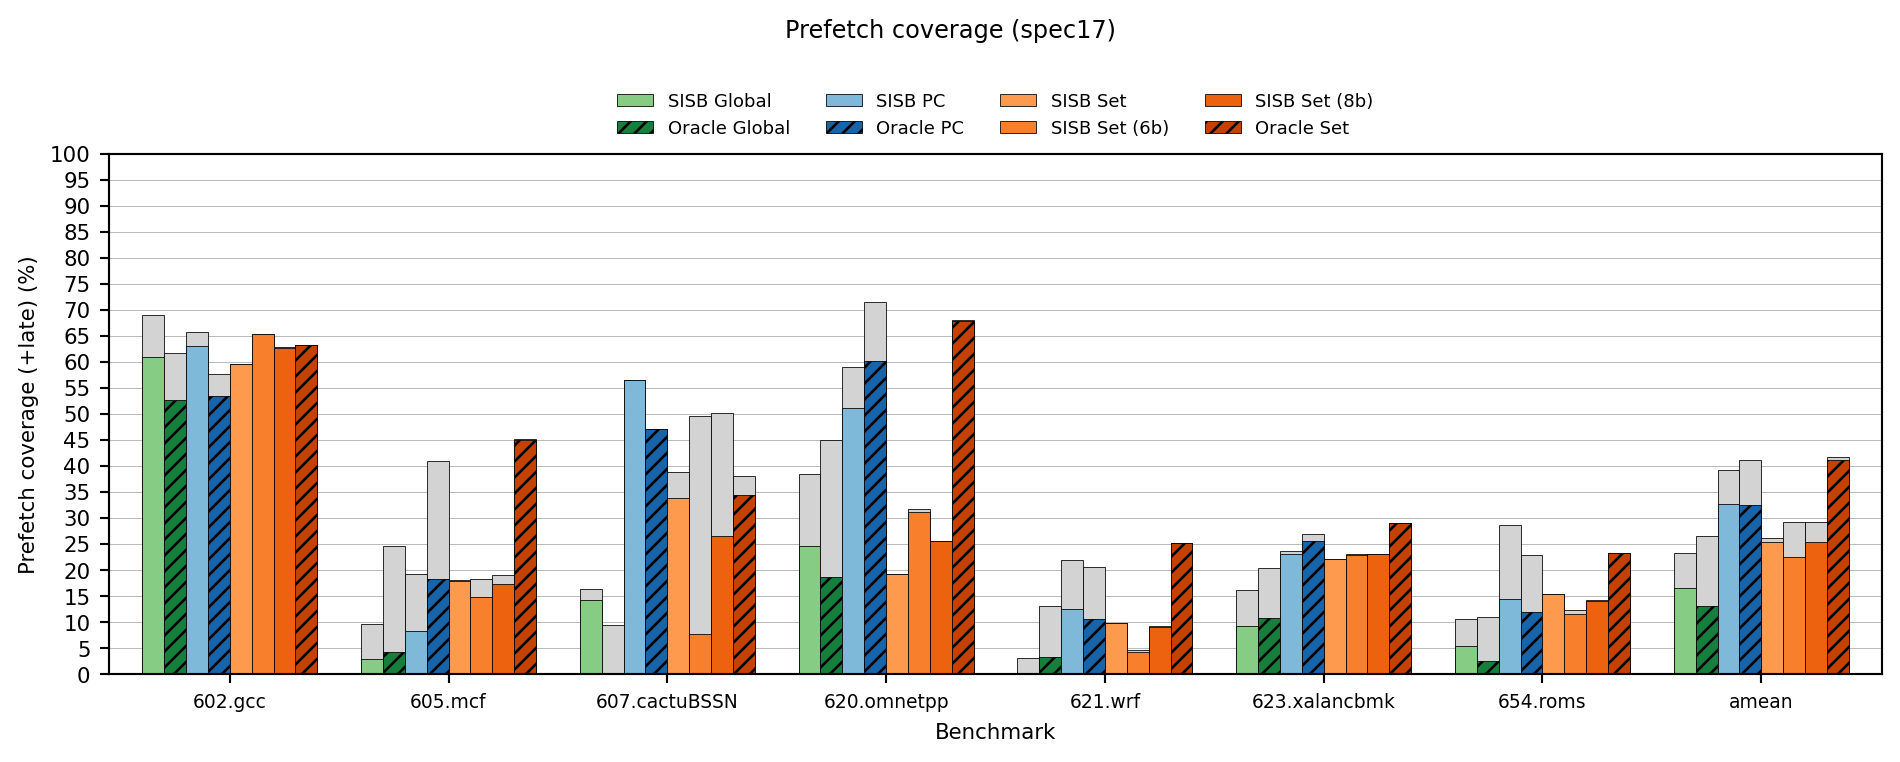

In [15]:
suite = "spec17"
figsize = (10, 4)
ylim = (0, 100)
ytick_distance = 5

prefetch_coverage_suite = tabler.table_statistic_benchmark(
    "cache.LLC.amean.prefetch_coverage", experiments=experiments, suites={suite},
    filter=True, add_mean=True, replace_nan=0.0
)

prefetch_coverage_untimely_suite = tabler.table_statistic_benchmark(
    "cache.LLC.amean.prefetch_coverage_untimely", experiments=experiments, suites={suite},
    filter=True, add_mean=True, replace_nan=0.0
)

prefetch_coverage_suite.display()
prefetch_coverage_untimely_suite.display()
prefetch_coverage_suite.plot(
    secondary_results=[prefetch_coverage_untimely_suite],
    legend_kwargs=legend_kwargs,
    label_kwargs=label_kwargs,
    colors=colors, hatches=hatches,
    add_suptitle=True, suptitle=f"Prefetch coverage ({suite})",
    ylabel="Prefetch coverage (+late) (%)",
    ylim=ylim, ytick_distance=ytick_distance,
    figsize=figsize, dpi=dpi
)
plt.savefig(f"temporal_oracle_vs_sisb/prefetch_coverage__{suite}.png", 
            bbox_inches="tight", dpi=dpi)

### gap

,bfs,cc,pr,amean
SISB Global,30.781756,17.763976,21.368464,23.304732
Oracle Global,48.076688,32.625127,43.917921,41.539912
SISB PC,68.593200,58.867264,80.113813,69.191426
Oracle PC,80.258706,48.898167,70.738156,66.631677
SISB Set,53.391508,50.543329,44.553401,49.496079
SISB Set (6b),47.374946,19.789150,21.024784,29.396294
SISB Set (8b),52.209779,39.533061,38.344132,43.362324
Oracle Set,93.253746,78.208624,86.858604,86.106991


,bfs,cc,pr,amean
SISB Global,40.022455,26.011909,25.908707,30.647690
Oracle Global,80.473165,62.117694,72.196648,71.595836
SISB PC,75.985485,98.364051,92.136752,88.828763
Oracle PC,90.778771,76.789496,82.912619,83.493629
SISB Set,53.415005,50.553446,44.569427,49.512626
SISB Set (6b),47.761181,19.862356,21.115808,29.579782
SISB Set (8b),52.341856,39.562343,38.377987,43.427395
Oracle Set,93.336555,78.344837,86.977761,86.219717


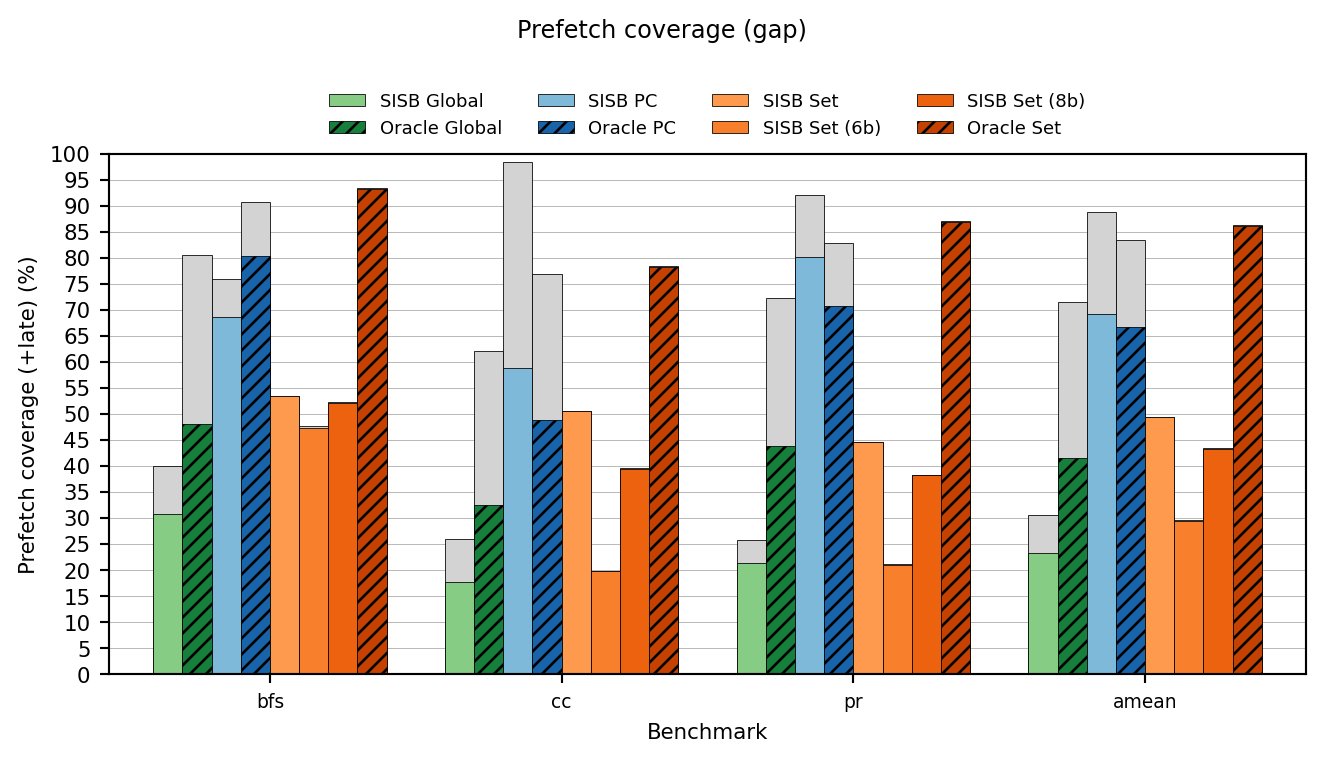

In [16]:
suite = "gap"
figsize = (7, 4)
ylim = (0, 100)
ytick_distance = 5

prefetch_coverage_suite = tabler.table_statistic_benchmark(
    "cache.LLC.amean.prefetch_coverage", experiments=experiments, suites={suite},
    filter=True, add_mean=True, replace_nan=0.0
)

prefetch_coverage_untimely_suite = tabler.table_statistic_benchmark(
    "cache.LLC.amean.prefetch_coverage_untimely", experiments=experiments, suites={suite},
    filter=True, add_mean=True, replace_nan=0.0
)

prefetch_coverage_suite.display()
prefetch_coverage_untimely_suite.display()
prefetch_coverage_suite.plot(
    secondary_results=[prefetch_coverage_untimely_suite],
    legend_kwargs=legend_kwargs,
    label_kwargs=label_kwargs,
    colors=colors, hatches=hatches,
    add_suptitle=True, suptitle=f"Prefetch coverage ({suite})",
    ylabel="Prefetch coverage (+late) (%)",
    ylim=ylim, ytick_distance=ytick_distance,
    figsize=figsize, dpi=dpi
)
plt.savefig(f"temporal_oracle_vs_sisb/prefetch_coverage__{suite}.png", 
            bbox_inches="tight", dpi=dpi)

### google

,charlie,delta,merced,whiskey,amean
SISB Global,6.182163,6.640236,11.226813,12.255792,9.076251
Oracle Global,5.255167,5.047847,8.979836,8.358491,6.910335
SISB PC,16.118378,6.265407,4.797515,16.606026,10.946831
Oracle PC,19.824150,12.404943,6.095497,24.071595,15.599046
SISB Set,4.564160,10.381967,18.991702,17.019940,12.739442
SISB Set (6b),8.505170,15.106379,24.677283,24.346767,18.158900
SISB Set (8b),7.816333,13.535928,22.832661,22.054128,16.559763
Oracle Set,21.947220,26.041555,32.318645,42.145251,30.613168


,charlie,delta,merced,whiskey,amean
SISB Global,8.985610,11.627808,21.185950,23.338588,16.284489
Oracle Global,13.489355,13.751871,21.158913,23.667112,18.016813
SISB PC,17.743335,9.365622,6.982473,21.002631,13.773515
Oracle PC,22.674104,16.266388,6.988496,29.994313,18.980825
SISB Set,4.577935,10.403967,19.030784,17.160161,12.793212
SISB Set (6b),8.693900,15.560698,25.439644,25.477275,18.792879
SISB Set (8b),7.879627,13.741567,23.068500,22.457548,16.786811
Oracle Set,22.022827,26.120519,32.392517,42.390419,30.731571


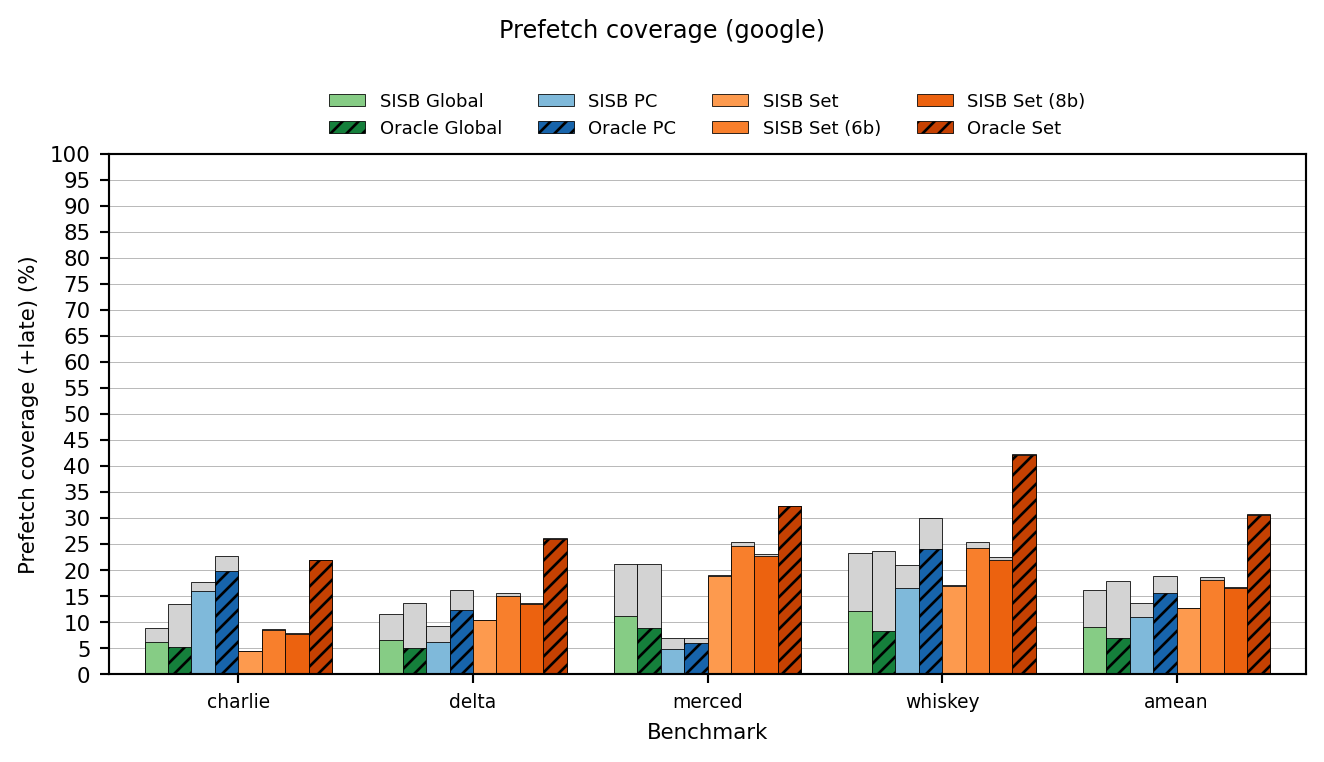

In [17]:
suite = "google"
figsize = (7, 4)
ylim = (0, 100)
ytick_distance = 5

prefetch_coverage_suite = tabler.table_statistic_benchmark(
    "cache.LLC.amean.prefetch_coverage", experiments=experiments, suites={suite},
    filter=True, add_mean=True, replace_nan=0.0
)

prefetch_coverage_untimely_suite = tabler.table_statistic_benchmark(
    "cache.LLC.amean.prefetch_coverage_untimely", experiments=experiments, suites={suite},
    filter=True, add_mean=True, replace_nan=0.0
)

prefetch_coverage_suite.display()
prefetch_coverage_untimely_suite.display()
prefetch_coverage_suite.plot(
    secondary_results=[prefetch_coverage_untimely_suite],
    legend_kwargs=legend_kwargs,
    label_kwargs=label_kwargs,
    colors=colors, hatches=hatches,
    add_suptitle=True, suptitle=f"Prefetch coverage ({suite})",
    ylabel="Prefetch coverage (+late) (%)",
    ylim=ylim, ytick_distance=ytick_distance,
    figsize=figsize, dpi=dpi
)
plt.savefig(f"temporal_oracle_vs_sisb/prefetch_coverage__{suite}.png", 
            bbox_inches="tight", dpi=dpi)